In [ ]:
"""
Analisi diffusione COVID-19 nel mondo Il committente richiede di avere un report su casi e vaccinazioni 
in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo 
https://github.com/owid/covid-19-data/tree/master/public/data; 
alla voce "🗂 Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce. 
•Si richiede di verificare le dimensioni del dataset e i relativi metadati; 
•Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente; 
•Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di 
continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale 
rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente); 
•Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali 
rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data 
(filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa 
nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali; 
•Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni 
riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 
(incluso), e scrivere un breve commento a riguardo; 
•Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizati 
per ognuna-- se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.
"""

In [1]:
import pandas as pd

In [148]:
covid = "owid-covid-data.csv"
df = pd.read_csv(covid)
#DIMENSIONE DATAFRAME
df.shape

(387330, 67)

In [149]:
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
327144,ESP,Europe,Spain,2021-12-21,5609092.0,0.0,33085.571,90691.0,0.0,71.571,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
181155,KGZ,Asia,Kyrgyzstan,2020-05-11,NaN,0.0,0.000,NaN,0.0,0.000,...,50.5,89.22,4.50,71.45,0.697,6630621.0,NaN,NaN,NaN,NaN
59603,CAN,North America,Canada,2023-06-14,4670563.0,0.0,0.000,52411.0,0.0,0.000,...,16.6,NaN,2.50,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
46750,BRA,South America,Brazil,2021-11-27,22003317.0,0.0,9160.143,612370.0,0.0,268.429,...,17.9,NaN,2.20,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
324144,KOR,Asia,South Korea,2022-02-27,3134456.0,1076295.0,153756.429,8058.0,608.0,86.857,...,40.9,NaN,12.27,83.03,0.916,51815808.0,11780.802,1.76,21.8,227.35922


In [150]:
#METADATI
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [51]:
#METADATI
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387330 entries, 0 to 387329
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387330 non-null  object 
 1   continent                                   387330 non-null  object 
 2   location                                    387330 non-null  object 
 3   date                                        387330 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [151]:
lista_continenti = df["continent"].unique()
lista_continenti

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [152]:
#CASI TOTALI PER CONTINENTE

tot_case_continent = df.groupby("continent")["total_cases"].max()
print(tot_case_continent)

continent
Africa             4072636.0
Asia              99343195.0
Europe            38997490.0
North America    103436829.0
Oceania           11812024.0
South America     37519960.0
Name: total_cases, dtype: float64


In [153]:
max_total_cases = df["total_cases"].max()
max_total_cases

774954379.0

In [154]:
#CONFRONTO EUROPA E ASIA
mask_euro = df[df["continent"] == "Europe"]["total_cases"]
mask_asia = df[df["continent"] == "Asia"]["total_cases"]

print(f"max di Europa: {mask_euro.max()}, mean di Europa: {mask_euro.mean().round(1)}")
print(f"max di Asia:   {mask_asia.max()}, mean di Asia:   {mask_asia.mean().round(1)}")

percentuale_euro_tot = round((mask_euro.max() / max_total_cases) * 100,1)
percentuale_asia_tot = round((mask_asia.max() / max_total_cases) * 100, 1)

print(f"La percentuale dei casi avvenuti in Europa sul totale è: {percentuale_euro_tot}%") 
print(f"La percentuale dei casi avvenuti in Asia sul totale è:  {percentuale_asia_tot}%")

max di Europa: 38997490.0, mean di Europa: 2669240.0
max di Asia:   99343195.0, mean di Asia:   3183043.1
La percentuale dei casi avvenuti in Europa sul totale è: 5.0%
La percentuale dei casi avvenuti in Asia sul totale è:  12.8%


In [155]:
#conversione colonna date da formato object a datetime
df['date'] = pd.to_datetime(df['date'])

<Axes: xlabel='date'>

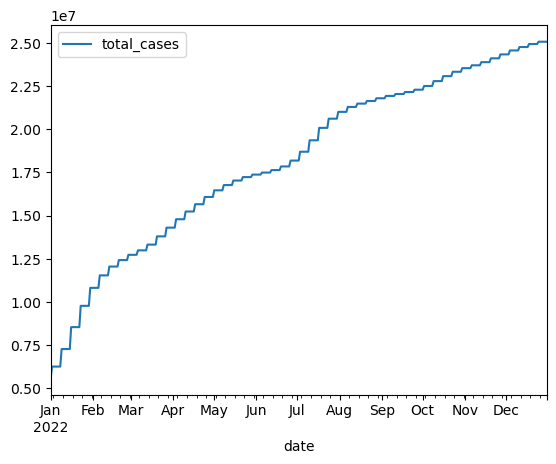

In [156]:
#CASI ITALIA 2022

dati_italia_2022 = df.loc[(df["location"] == "Italy") & (df["date"].dt.year == 2022) ]
dati_italia_2022.plot(x="date", y="total_cases")

<Axes: xlabel='date'>

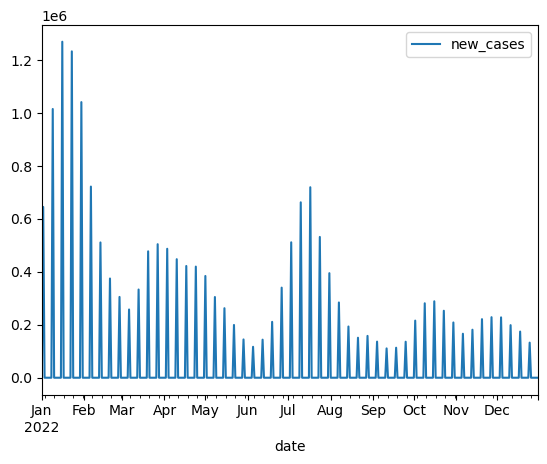

In [157]:
dati_italia_2022.plot(x="date", y="new_cases")

<Axes: xlabel='date'>

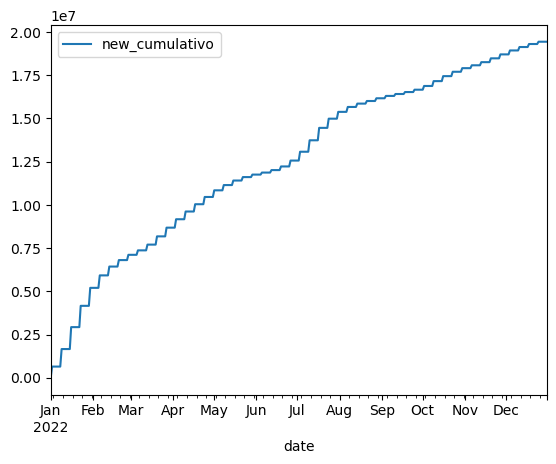

In [163]:
dati_italia_2022.loc[:,"new_cumulativo"] = dati_italia_2022["new_cases"].cumsum()
dati_italia_2022.plot(x="date", y="new_cumulativo")
"""
l'andamento della linea lungo l'asse delle x è identico al grafico sopra riportato relativo a total_cases.
l'unica differenza è riscontrabile nei valori dell'asse y, che in questo caso parte da 0 mentre nel grafico sopra 
riportato parte dal valore dei total_cases al 1/1/2022.
"""

In [164]:
import seaborn as sns

<Axes: xlabel='location', ylabel='icu_patients'>

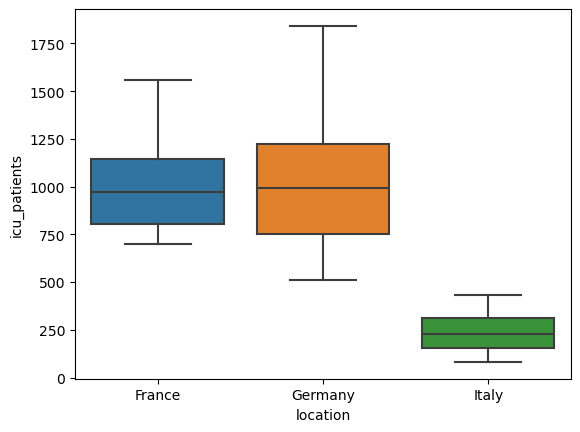

In [170]:
igf = df[df["location"].isin(["Italy", "Germany", "France"])]
igf_date = igf[(igf["date"] >= "2022-05-01") & (igf["date"] <= "2023-04-30")]

sns.boxplot(data= igf_date, x= "location", y= "icu_patients")
"""
Dal boxplot dei pazienti in terapia intensiva dei paesi selezionati si osserva:
L'Italia risulta il paese con il minor numero di pazienti in terapia intensiva e il range di valori più contenuto.
La Germania ha i valori di mediana e massimo più alti tra i paesi in esame, 
oltre ad il range di valori più ampio con un picco di variabilità nell'ultimo quartile.
La Francia ha un valore di mediana vicino a quello della germania ma il range di valori è più contenuto.
"""

In [185]:
igfs_2023 = df[(df["location"].isin(["Italy", "Germany", "France", "Spain"])) & (df["date"].dt.year == 2023)]
print(igfs_2023.groupby("location")["hosp_patients"].sum())
igfs_2023["hosp_patients"].info()
"""
Risultano assenti oltre la metà dei valori e mancano interamente i dati relativi alla Germania. 
La sostituzione dei valori na non è consigliata. 
"""

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
<class 'pandas.core.series.Series'>
Index: 1460 entries, 117651 to 327884
Series name: hosp_patients
Non-Null Count  Dtype  
--------------  -----  
617 non-null    float64
dtypes: float64(1)
memory usage: 22.8 KB
